In [15]:
# Importing required libraries

# Data manipulation and analysis
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Audio processing
import librosa
import IPython.display as ipd

# File system operations
import os

## **Importing and playing a first audio file**

In [16]:
audio_path = '../data/raw/genres_original/reggae/reggae.00000.wav'
# sr=None to preserve the native sampling rate
array, sampling_rate = librosa.load(audio_path, sr=None)

print(f'x: {array.shape}', f'sample rate: {sampling_rate}', sep='\n')

x: (661794,)
sample rate: 22050


This returns an audio time series as a numpy array with a default sampling rate(sr) of 22KHZ mono. The sampling rate (also called sampling frequency) is the number of samples taken in one second and is measured in hertz (Hz).

The audible frequencies in human speech are below 8 kHz and therefore sampling speech at 16 kHz is sufficient (Nyquist). Using a higher sampling rate will not capture more information and merely leads to an increase in the computational cost of processing such files.

In [17]:
array, sampling_rate = librosa.load(audio_path, sr=16000)

print(f'x: {array.shape}', f'sample rate: {sampling_rate}', sep='\n')

x: (480214,)
sample rate: 16000


The amplitude of a sound describes the sound pressure level at any given instant and is measured in decibels (dB). In digital audio, each audio sample records the amplitude of the audio wave at a point in time. 

Also, the bit depth of the sample determines with how much precision this amplitude value can be described. The higher the bit depth, the more faithfully the digital representation approximates the original continuous sound wave.

In [18]:
print('Amplitude sample:', array[:5])

print('bit depth:', array.dtype)

Amplitude sample: [0.00518333 0.01790155 0.07761538 0.12327619 0.07922523]
bit depth: float32


Each is a binary term, representing the number of possible steps to which the amplitude value can be quantized when it’s converted from continuous to discrete: 65,536 steps for 16-bit audio, a whopping 16,777,216 steps for 24-bit audio.

Because quantizing involves rounding off the continuous value to a discrete value, the **sampling process introduces noise**. The **higher the bit depth, the smaller this quantization noise**. 

In practice, the quantization noise of 16-bit audio is already small enough to be inaudible, and using higher bit depths is generally not necessary.

In [19]:
# To display and listen the audio file we use the ipd.Audio widget
ipd.Audio(audio_path)

## **Audio Visualization**

Just as with continuous audio signals, the amplitude of digital audio is typically expressed in decibels (dB). Since human hearing is logarithmic in nature — our ears are more sensitive to small fluctuations in quiet sounds than in loud sounds — the loudness of a sound is easier to interpret if the amplitudes are in decibels, which are also logarithmic.

The decibel scale for real-world audio starts at 0 dB, which represents the quietest possible sound humans can hear, and louder sounds have larger values. However, for digital audio signals, 0 dB is the loudest possible amplitude, while all other amplitudes are negative. As a quick rule of thumb: every -6 dB is a halving of the amplitude, and anything below -60 dB is generally inaudible unless you really crank up the volume.

### **Waveform**

A Waveform plots the sample values over time and illustrates the changes in the sound’s amplitude. This is also known as the time domain representation of sound.

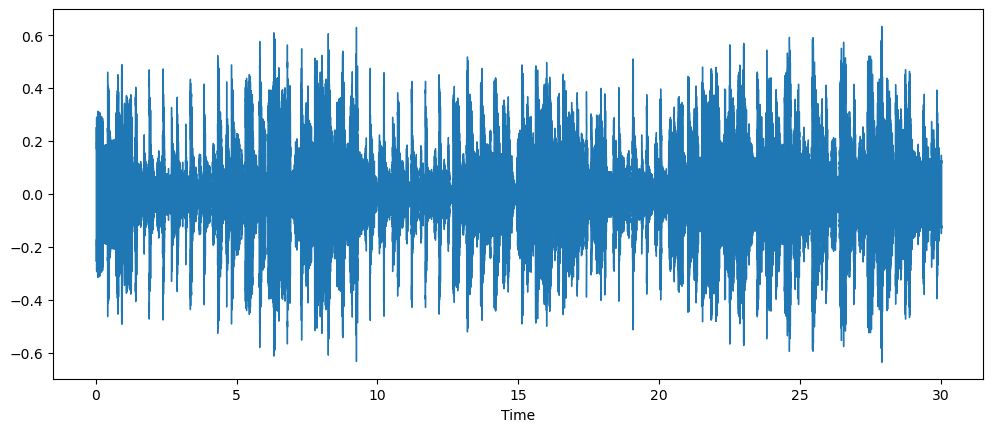

In [20]:
plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)

This plots the amplitude of the signal on the y-axis and time along the x-axis. In other words, each point corresponds to a single sample value that was taken when this sound was sampled. 

Also note that librosa returns the audio as floating-point values already, and that the amplitude values are indeed within the [-1.0, 1.0] range.